# Projeto Final de Ciência de Dados - Análise dos casos de dengue no Brasil em 2024 e predição de óbito

## Grupo: 15

## Alunos:
### - Leonardo Ishida - 12873424
### - Enzo Yasuo Hirano Harada - 13781841

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/exercicio-feitos/trabson/dataset_sus/sinan_dengue_sample_2024.csv')
pd.set_option("display.max_columns", None)
df.head()

<ipython-input-3-0af4fad862a8>:1: DtypeWarning: Columns (44,45,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/exercicio-feitos/trabson/dataset_sus/sinan_dengue_sample_2024.csv')


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,2024-02-28,202409,2024,31,315460,1449.0,2182343.0,2024-02-24,202408,1959.0,4064,F,5.0,4.0,9.0,31,315460.0,1449.0,1,2024-02-28,NaN,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2024-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2024-03-15,0.0,NaN,NaN
1,2,A90,2024-02-01,202405,2024,31,311860,1449.0,2189879.0,2024-01-31,202405,2010.0,4013,M,6.0,4.0,9.0,31,311860.0,1449.0,1,2024-02-01,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2024-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2024-03-15,0.0,NaN,NaN
2,2,A90,2024-02-08,202406,2024,31,313170,1451.0,2150751.0,2024-02-07,202406,1991.0,4032,F,9.0,4.0,NaN,31,313170.0,1451.0,1,2024-02-08,NaN,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2024-02-08,1.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1.0,31.0,1.0,313170.0,10.0,2.0,NaN,NaN,1.0,NaN,2024-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2024-02-21,1.0,NaN,NaN
3,2,A90,2024-01-29,202405,2024,31,313170,1451.0,9085777.0,2024-01-26,202404,2007.0,4016,F,5.0,4.0,5.0,31,313170.0,1451.0,1,2024-01-29,NaN,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,4.0,2.0,NaN,NaN,NaN,1.0,31.0,1.0,313170.0,10.0,2.0,NaN,NaN,1.0,NaN,2024-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2024-03-14,1.0,NaN,NaN
4,2,A90,2024-02-21,202408,2024,31,316040,1472.0,7933401.0,2024-02-19,202408,2006.0,4017,F,9.0,9.0,NaN,31,316040.0,1472.0,1,2024-02-21,NaN,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2024-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2024-03-22,0.0,NaN,NaN


# **Tratamento dos dados**

## Dropando colunas com mais de 50% de dados faltantes

In [ ]:
# Calculando quantos dados faltantes existem em cada coluna, com exceao das datas de obito e internacao
missing_values = df.drop(['DT_OBITO', 'DT_INTERNA'], axis=1).isnull().sum()

# Colocando em porcentagem
missing_percentage = (missing_values / len(df)) * 100

# Criando dataframe
missing_data_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': missing_percentage.values
})

# colunas para serem descartadas
columns_to_drop = missing_data_summary[missing_data_summary['Percentage'] > 50].Column

# Dropando colunas
df = df.drop(columns=columns_to_drop)

print(columns_to_drop)

22     ID_OCUPA_N
44     DT_CHIK_S1
45     DT_CHIK_S2
46        DT_PRNT
47     RES_CHIKS1
          ...    
111       CON_FHD
112      COMPLICA
114     NDUPLIC_N
117     FLXRECEBI
118     MIGRADO_W
Name: Column, Length: 67, dtype: object


## Selecionando alguns exemplos para serem trabalhados, pois temos muitos dados e não estamos conseguindo fazer o pré processamento por falta de RAM. Selecionamos 40% do dataset orignal, que sao +- 600.000 amostras, depois iremos fazer o oversampling da classe minoritaria

In [ ]:
mask = df['DT_OBITO'].isna() & df['ID_MUNICIP'].notna()
df_sem_obito = df[mask].sample(frac=0.4, random_state=42)
df = pd.concat([df_sem_obito, df[df['DT_OBITO'].notna()]])
df.shape

(604588, 54)

## Guardando data de morte e data de internacao

In [ ]:
results = []

for index, row in df.iterrows():
    if not pd.isna(row['DT_OBITO']):
        results.append({'DT_OBITO': row['DT_OBITO'], 'DT_INTERNA': row['DT_INTERNA']})

tempo_obito_internacao = pd.DataFrame(results)
tempo_obito_internacao.head()

,DT_OBITO,DT_INTERNA
0,2024-01-29,2024-01-22
1,2024-01-13,2024-01-12
2,2024-01-28,2024-01-20
3,2024-01-24,2024-01-22
4,2024-01-19,2024-02-22


## Susbtituindo as datas por valors binarios

In [ ]:
def convert_dates_to_binary(df, date_columns):
    for column in date_columns:
        df[column] = df[column].apply(lambda date_value: 1 if not pd.isna(date_value) else 0)

    return df

# Datas a serem trocadas
date_columns = ['DT_SIN_PRI', 'DT_INTERNA', 'DT_ENCERRA', 'DT_INVEST', 'DT_OBITO']

df = convert_dates_to_binary(df, date_columns)
df['DT_OBITO'].value_counts()

,count
DT_OBITO,
0,602940
1,1648


## Removendo colunas com valores constantes

In [ ]:
const_cols = [c for c in df.columns if df[c].nunique(dropna=False)==1]
print(const_cols)

df.drop(const_cols, axis=1, inplace=True)

['TP_NOT', 'ID_AGRAVO', 'DT_SIN_PRI', 'ID_PAIS']


## Removendo linhas duplicadas

In [ ]:
dupe_rows = df[df.duplicated()]
print(dupe_rows.shape)

df.drop_duplicates(inplace=True)

(358, 50)


## Drop de colunas que não sabemos o significado e não existem na documentação

In [ ]:
colunas_drop = ['TPAUTOCTO', 'TP_SISTEMA', 'CS_FLXRET']
df.drop(colunas_drop, axis=1, inplace=True)

###Repartindo colunas com tipo datetime em ano, mês e dia e dropando

In [ ]:
# Convertendo a coluna 'DT_NOTIFIC' para datetime
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], errors='coerce')

df['ano'] = df['DT_NOTIFIC'].dt.year
df['mes'] = df['DT_NOTIFIC'].dt.month
df['dia'] = df['DT_NOTIFIC'].dt.day

df.drop(['DT_NOTIFIC'], axis=1, inplace=True)

## Criação de novas features

### Estações do ano

In [ ]:
def get_season(month):
  if month in [12, 1, 2]:
    return 'Verão'
  elif month in [3, 4, 5]:
    return 'Outono'
  elif month in [6, 7, 8]:
    return 'Inverno'
  elif month in [9, 10, 11]:
    return 'Primavera'
  else:
    return 'Desconhecido'

# Criando a coluna 'estacao_ano' a partir do mes da coluna mes
df['estacao_ano'] = df['mes'].apply(get_season)
df['estacao_ano'].value_counts()

,count
estacao_ano,
Outono,378226
Verão,194246
Inverno,31758


### Interior ou capital

In [ ]:
capitais_brasil = {
    110020.0: 'Porto Velho',
    120040.0: 'Rio Branco',
    130260.0: 'Manaus',
    140010.0: 'Boa Vista',
    150140.0: 'Belém',
    160030.0: 'Macapá',
    172100.0: 'Palmas',
    211130.0: 'São Luís',
    221100.0: 'Teresina',
    230440.0: 'Fortaleza',
    240810.0: 'Natal',
    250750.0: 'João Pessoa',
    260990.0: 'Recife',
    270430.0: 'Maceió',
    280030.0: 'Aracaju',
    292740.0: 'Salvador',
    310620.0: 'Belo Horizonte',
    320530.0: 'Vitória',
    330455.0: 'Rio de Janeiro',
    355030.0: 'São Paulo',
    410690.0: 'Curitiba',
    420540.0: 'Florianópolis',
    431490.0: 'Porto Alegre',
    500270.0: 'Campo Grande',
    510340.0: 'Cuiabá',
    520870.0: 'Goiânia',
    530010.0: 'Brasília'
}
codigos_capitais = list(capitais_brasil.keys())

def is_capital(row):
    codigo = row['ID_MUNICIP']
    return 'Capital' if codigo in codigos_capitais else 'Interior'

df['localizacao'] = df.apply(is_capital, axis=1)
df['localizacao'].value_counts()

,count
localizacao,
Interior,490794
Capital,113436


### Estados por sigla

In [ ]:
# Criando um dicionário de mapeamento entre código e sigla do estado para analises futuras
uf_map = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO',
    21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE',
    29: 'BA', 31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP', 41: 'PR', 42: 'SC', 43: 'RS',
    50: 'MS', 51: 'MT', 52: 'GO', 53: 'DF'
}

df['SG_UF'] = df['SG_UF_NOT'].map(uf_map)

# **Análise exploratória de dados**

In [ ]:
!pip install altair==5.4.1

In [ ]:
import matplotlib.pyplot as plt
import altair as alt

In [ ]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Quais doenças são mais comum no paciente

In [ ]:
sintomas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE']

# Contando ocorrencias de cada sintoma
contagem_sintomas = [df[coluna].value_counts().get(1.0, 0) for coluna in sintomas]

# Dataframe com os dados
chart_df = pd.DataFrame({
    'sintoma': sintomas,
    'contagem': contagem_sintomas
})

# Grafico de barras
chart = alt.Chart(chart_df).mark_rect().encode(
    x=alt.X('sum(contagem):Q', stack='zero', title=None),
    y=alt.Y('sintoma:N', title=None).sort('-x'),
    color=alt.Color('contagem:Q', scale=alt.Scale(scheme='blues')),
    tooltip=['sintoma:N', 'contagem:Q']
).properties(
    width=800,
    height=400,
    title='Sintomas da dengue'
)

text = chart.mark_text(
    align='center',
    baseline='middle',
    dx=15
)

chart_with_text = chart + text

chart_with_text.display()

chart_df = None
gc.collect()

alt.LayerChart(...)

467

## Caso em que o paciente morreu

In [ ]:
death_cases = df[df['DT_OBITO'] == 1]

disease_frequencies = pd.DataFrame({
    'Disease': sintomas,
    'Frequency': [death_cases[coluna].value_counts().get(1.0, 0) for coluna in sintomas]
})

chart = alt.Chart(disease_frequencies).mark_bar().encode(
    x='Frequency:Q',
    y=alt.Y('Disease:N').sort('-x'),
    color=alt.Color('Frequency:Q', scale=alt.Scale(scheme='blues')),
    tooltip=['Disease', 'Frequency']
).properties(
    width=800,
    height=400,
    title='Sintomas da dengue das pessoas que morreram'
)

text = chart.mark_text(
    align='center',
    baseline='middle',
    dx=15
)

chart_with_text = chart + text

chart_with_text.display()

disease_frequencies = None
gc.collect()

alt.LayerChart(...)

117

## Como as estações do ano influenciam nos casos de dengue

In [ ]:
# Agregando casos por estacao
count_estacao = df.groupby('estacao_ano')['estacao_ano'].count().reset_index(name='count')

# Grafico de barras
base = alt.Chart(count_estacao).encode(
    x='estacao_ano',
    y="count:Q",
    text='count:Q',
    tooltip=['estacao_ano', 'count']
)
bar = base.mark_bar().properties(
    width=400,
    height=400
)
text = base.mark_text(
    align='center',
    dy=-10,
    fontSize=14
).encode(
    text='count:Q'
)

chart = bar + text
chart.display()

count_estacao = None
gc.collect()

alt.LayerChart(...)

169

In [ ]:
month_names = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apb', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}

# Agregando casos por mes
count_mes = df.groupby('mes')['mes'].count().reset_index(name='count')
count_mes['nome_mes'] = count_mes['mes'].map(month_names)

# Dataframe com os 12 meses do ano
all_months = pd.DataFrame({'mes': range(1, 13)})
all_months['nome_mes'] = all_months['mes'].map(month_names)

# Merge dos datasets
final_count_mes = pd.merge(all_months, count_mes, on=['mes', 'nome_mes'], how='left').fillna(0)

# Grafico de linhas
chart = alt.Chart(final_count_mes).mark_line(point=True).encode(
    alt.X('nome_mes:N', sort=alt.EncodingSortField(field="mes", order='ascending')),
    y='count:Q',
    tooltip=['nome_mes', 'count']
).properties(
    title='Quantidade de casos por mês',
    width=800,
    height=400
)

chart.display()

final_count_mes = None
gc.collect()

alt.Chart(...)

178

In [ ]:

# Group by month and count deaths
deaths_per_month = df.groupby('mes')['DT_OBITO'].sum().reset_index(name='count')
deaths_per_month['nome_mes'] = count_mes['mes'].map(month_names)

# Merge dos datasets
final_count_mes = pd.merge(all_months, count_mes, on=['mes', 'nome_mes'], how='left').fillna(0)

# Grafico de linhas
chart = alt.Chart(final_count_mes).mark_line(point=True).encode(
    alt.X('nome_mes:N', sort=alt.EncodingSortField(field="mes", order='ascending')),
    y='count:Q',
    tooltip=['nome_mes', 'count']
).properties(
    title='Quantidade de mortes por mês',
    width=800,
    height=400
)

chart.display()

final_count_mes = None
gc.collect()

alt.Chart(...)

175

## Analisando casos por estado

In [ ]:
# Agregando casos por estado
casos_por_estado = df.groupby('SG_UF').size().reset_index()
casos_por_estado = casos_por_estado.rename(columns={0: 'total_casos'})

# Agregando mortes por estado
mortes_por_estado = df.groupby('SG_UF')['DT_OBITO'].sum().reset_index()
mortes_por_estado = mortes_por_estado.rename(columns={'DT_OBITO': 'total_obitos'})

casos_mortes_estado = pd.merge(casos_por_estado, mortes_por_estado, on='SG_UF', how='left')

# Melt no dataset
casos_mortes_estado = casos_mortes_estado.melt(
    id_vars=['SG_UF'],
    value_vars=['total_casos', 'total_obitos'],
    var_name='Tipo',
    value_name='Valor'
)

# Grafico de barras agrupado
base = alt.Chart(casos_mortes_estado).encode(
    x='Tipo:O',
    y='Valor:Q',
    color='Tipo:N',
    tooltip=['SG_UF', 'Tipo', 'Valor']
)

bars = base.mark_bar()

text = base.mark_text(
    align='center',
    baseline='bottom',
    dy=-5
).encode(
    text='Valor:Q'
)

layered_chart = alt.layer(bars, text)

chart = layered_chart.facet(
    column='SG_UF:N'
).properties(
    title='Casos e Mortes por Estado'
)

chart.display()

casos_mortes_estado = None
gc.collect()

alt.FacetChart(...)

86

In [ ]:
# Agrupando os casos por localizacao (interior ou capital)
casos_interior = df.groupby('localizacao').size().reset_index()
casos_interior = casos_interior.rename(columns={0: 'total_casos'})

# Agregando as mortes por localizacao (interior ou capital)
mortes_interior = df.groupby('localizacao')['DT_OBITO'].sum().reset_index()
mortes_interior = mortes_interior.rename(columns={'DT_OBITO': 'total_obitos'})

casos_mortes_local = pd.merge(casos_interior, mortes_interior, on='localizacao', how='left')

# Fazendo melt no dataset
casos_mortes_local = casos_mortes_local.melt(
    id_vars=['localizacao'],
    value_vars=['total_casos', 'total_obitos'],
    var_name='Tipo',
    value_name='Valor'
)

# Grafico de barras
base = alt.Chart(casos_mortes_local).encode(
    x=alt.X('localizacao:N', title='Localização'),
    y=alt.Y('Valor:Q', title='Total'),
    color=alt.Color('Tipo:N', scale=alt.Scale(
        domain=['total_casos', 'total_obitos'],
        range=['#5276A7', '#EF4444']
    )),
    tooltip=['localizacao:N', 'Tipo:N', 'Valor:Q']
)

bars = base.mark_bar()
text = base.mark_text(
    align='center',
    baseline='middle',
    dy=-10,
    color='white'
).encode(
    text='Valor:Q'
)

chart = (bars + text).properties(
    title='Total de Casos e Óbitos por Localização',
    width=600,
    height=400
)

chart.display()

casos_mortes_local = None
gc.collect()

alt.LayerChart(...)

169

## Diferenca de tempo entre internacao e data de morte

In [ ]:
# Convertendo datas
tempo_obito_internacao['DT_OBITO'] = pd.to_datetime(tempo_obito_internacao['DT_OBITO'], errors='coerce')
tempo_obito_internacao['DT_INTERNA'] = pd.to_datetime(tempo_obito_internacao['DT_INTERNA'], errors='coerce')

# Difenreca entre os dias de obito e internacao
tempo_obito_internacao['DIFERENCA_DIAS'] = (tempo_obito_internacao['DT_OBITO'] - tempo_obito_internacao['DT_INTERNA']).dt.days

# Dropando valores com valores nulos
tempo_obito_internacao.dropna(subset=['DIFERENCA_DIAS'], inplace=True)

# Dropando valores negativos(inconsistentes)
tempo_obito_internacao = tempo_obito_internacao[tempo_obito_internacao['DIFERENCA_DIAS'] >= 0]

Q1 = tempo_obito_internacao['DIFERENCA_DIAS'].quantile(0.25)
Q3 = tempo_obito_internacao['DIFERENCA_DIAS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
tempo_obito_internacao = tempo_obito_internacao[
    (tempo_obito_internacao['DIFERENCA_DIAS'] >= lower_bound) &
    (tempo_obito_internacao['DIFERENCA_DIAS'] <= upper_bound)
]

# Grafico de barras
chart = alt.Chart(tempo_obito_internacao).mark_bar().encode(
    alt.X("DIFERENCA_DIAS:Q", bin=alt.Bin(maxbins=25)),
    alt.Y('count()', stack=None),
    tooltip=['count()']
).properties(
    title='Histograma da Diferença de Dias entre Óbito e Internação',
    width=800,
    height=400
)

chart.display()

tempo_obito_internacao = None
gc.collect()

alt.Chart(...)

92

# Analise dos casos por ano

In [ ]:
# Lendo um dataset so com casos de morte de 2021 a 2024
df_mortes = pd.read_csv('/content/drive/MyDrive/exercicio-feitos/trabson/dataset_sus/mortes.csv')
df_mortes.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,2024-01-22,202404,2024,31,316890,1456.0,2101963.0,2024-01-20,202403,1930.0,4093,M,6.0,1.0,1.0,31,316890.0,1456.0,1.0,2024-01-22,999993,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2024-01-22,1.0,NaN,4.0,NaN,4.0,NaN,4.0,4.0,1.0,2024-01-22,31.0,316890.0,1.0,31.0,1.0,316890.0,10.0,2.0,NaN,NaN,4.0,2024-01-29,2024-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2024-01-24,1.0,NaN,NaN
1,2,A90,2024-01-08,202402,2024,31,315010,1452.0,2184281.0,2024-01-08,202402,1960.0,4063,M,6.0,2.0,NaN,31,315010.0,1452.0,1.0,2024-01-08,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-01-12,31.0,313670.0,1.0,31.0,1.0,315010.0,11.0,2.0,NaN,NaN,2.0,2024-01-13,2024-03-25,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2024-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2024-01-25,1.0,NaN,NaN
2,2,A90,2024-01-20,202403,2024,31,316720,1467.0,2206544.0,2024-01-15,202403,1948.0,4075,M,6.0,1.0,9.0,31,311890.0,1467.0,1.0,2024-01-20,NaN,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-01-20,31.0,316720.0,NaN,NaN,NaN,NaN,12.0,1.0,NaN,NaN,2.0,2024-01-28,2024-02-09,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2024-01-18,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2024-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2024-01-29,1.0,NaN,NaN
3,2,A90,2024-01-22,202404,2024,31,315600,1451.0,2135140.0,2024-01-18,202403,1939.0,4084,M,6.0,4.0,9.0,31,315600.0,1451.0,1.0,2024-01-22,NaN,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2024-01-22,1.0,NaN,4.0,NaN,4.0,NaN,4.0,4.0,1.0,2024-01-22,31.0,315600.0,1.0,31.0,1.0,315600.0,12.0,2.0,NaN,NaN,2.0,2024-01-24,2024-03-01,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2024-01-22,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2024-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2024-01-24,1.0,NaN,NaN
4,2,A90,2024-01-18,202403,2024,31,310620,1449.0,2192896.0,2024-01-16,202403,1989.0,4034,M,6.0,4.0,NaN,31,310620.0,1449.0,1.0,2024-01-18,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2024-01-21,2.0,NaN,4.0,2024-01-21,2.0,NaN,4.0,4.0,1.0,2024-02-22,31.0,310620.0,1.0,31.0,1.0,310620.0,8.0,NaN,NaN,NaN,3.0,2024-01-19,2024-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# Convertendo a data
df_mortes['DT_NOTIFIC'] = pd.to_datetime(df_mortes['DT_NOTIFIC'], errors='coerce')

df_mortes['ano'] = df_mortes['DT_NOTIFIC'].dt.year
df_mortes['mes'] = df_mortes['DT_NOTIFIC'].dt.month
df_mortes['dia'] = df_mortes['DT_NOTIFIC'].dt.day

df_mortes.drop(['DT_NOTIFIC'], axis=1, inplace=True)

In [ ]:
# Agregando dados por ano e mes
count_mes = df_mortes.groupby(['ano', 'mes'])['mes'].count().reset_index(name='count')
count_mes['nome_mes'] = count_mes['mes'].map(month_names)

# Criando um dataframe com todos os meses e anos, pois existem casos que um mes nao teve casos registrados
all_combinations = pd.DataFrame([(year, month) for year in df_mortes['ano'].unique() for month in range(1, 13)],
                                 columns=['ano', 'mes'])
all_combinations['nome_mes'] = all_combinations['mes'].map(month_names)

# Juntando em um unico dataframe
final_count_mes = pd.merge(all_combinations, count_mes, on=['ano', 'mes', 'nome_mes'], how='left').fillna(0)

# Grafico de linhas
chart = alt.Chart(final_count_mes).mark_line(point=True).encode(
    alt.X('nome_mes:N', sort=alt.EncodingSortField(field="mes", order='ascending')),
    y='count:Q',
    tooltip=['nome_mes', 'count'],
    color='ano:N'
).properties(
    title='Quantidade de mortes por mês',
    width=800,
    height=400
)

chart.display()

final_count_mes = None
df_mortes = None
gc.collect()

alt.Chart(...)

175

#Desenvolvimento do modelo


## Função de pré processamento

Utilizamos um pipeline para fazer o pré processamento do modelo, que conta com imputação de valores ausentes, one hot encoding de variáveis categóricas e algumas imputações que seguem alguns critérios da documentação do dataset.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


def preprocess(X_train, X_test, y_train, y_test):
    # Columns definitions
    cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
    imp_9_cols = ['HOSPITALIZ', 'EVOLUCAO', 'CS_ESCOL_N']
    imp_0_cols = ['CRITERIO']

    # Remove specific columns from num_cols
    num_cols = list(set(num_cols) - set(imp_9_cols + imp_0_cols))
    # print(num_cols)
    # print(cat_cols)

    # Pipelines
    pipeline_numerico = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ])

    pipeline_categorico = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    # Valores == 9 para casos ignorados (modelo do pdf)
    pipeline9 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=9))
    ])

    # Inserindo 0 como critério pq outros valores significam confirmacao ou descarte
    pipeline0 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0))
    ])

    # ColumnTransformer
    transformacao = ColumnTransformer(
        transformers=[
            ('transformacao numerica', pipeline_numerico, num_cols),
            ('transformacao categorica', pipeline_categorico, cat_cols),
            ('imputer 9', pipeline9, imp_9_cols),
            ('imputer 0', pipeline0, imp_0_cols),
        ],
    )

    # Fit and transform
    X_modf_train = transformacao.fit_transform(X_train)
    X_modf_test = transformacao.transform(X_test)

    # Feature names
    num_features = transformacao.transformers_[0][2]

    # Get categorical feature names
    cat_features = list(transformacao.transformers_[1][1]['onehot'].get_feature_names_out(cat_cols))

    # Get names for features with constant value (9 and 0)
    other_features = imp_9_cols + imp_0_cols

    # Combine all feature names
    feature_names = num_features + cat_features + other_features

    return X_modf_train, X_modf_test, y_train, y_test, feature_names

## Analisando correlação entre features

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[num_cols].corr()

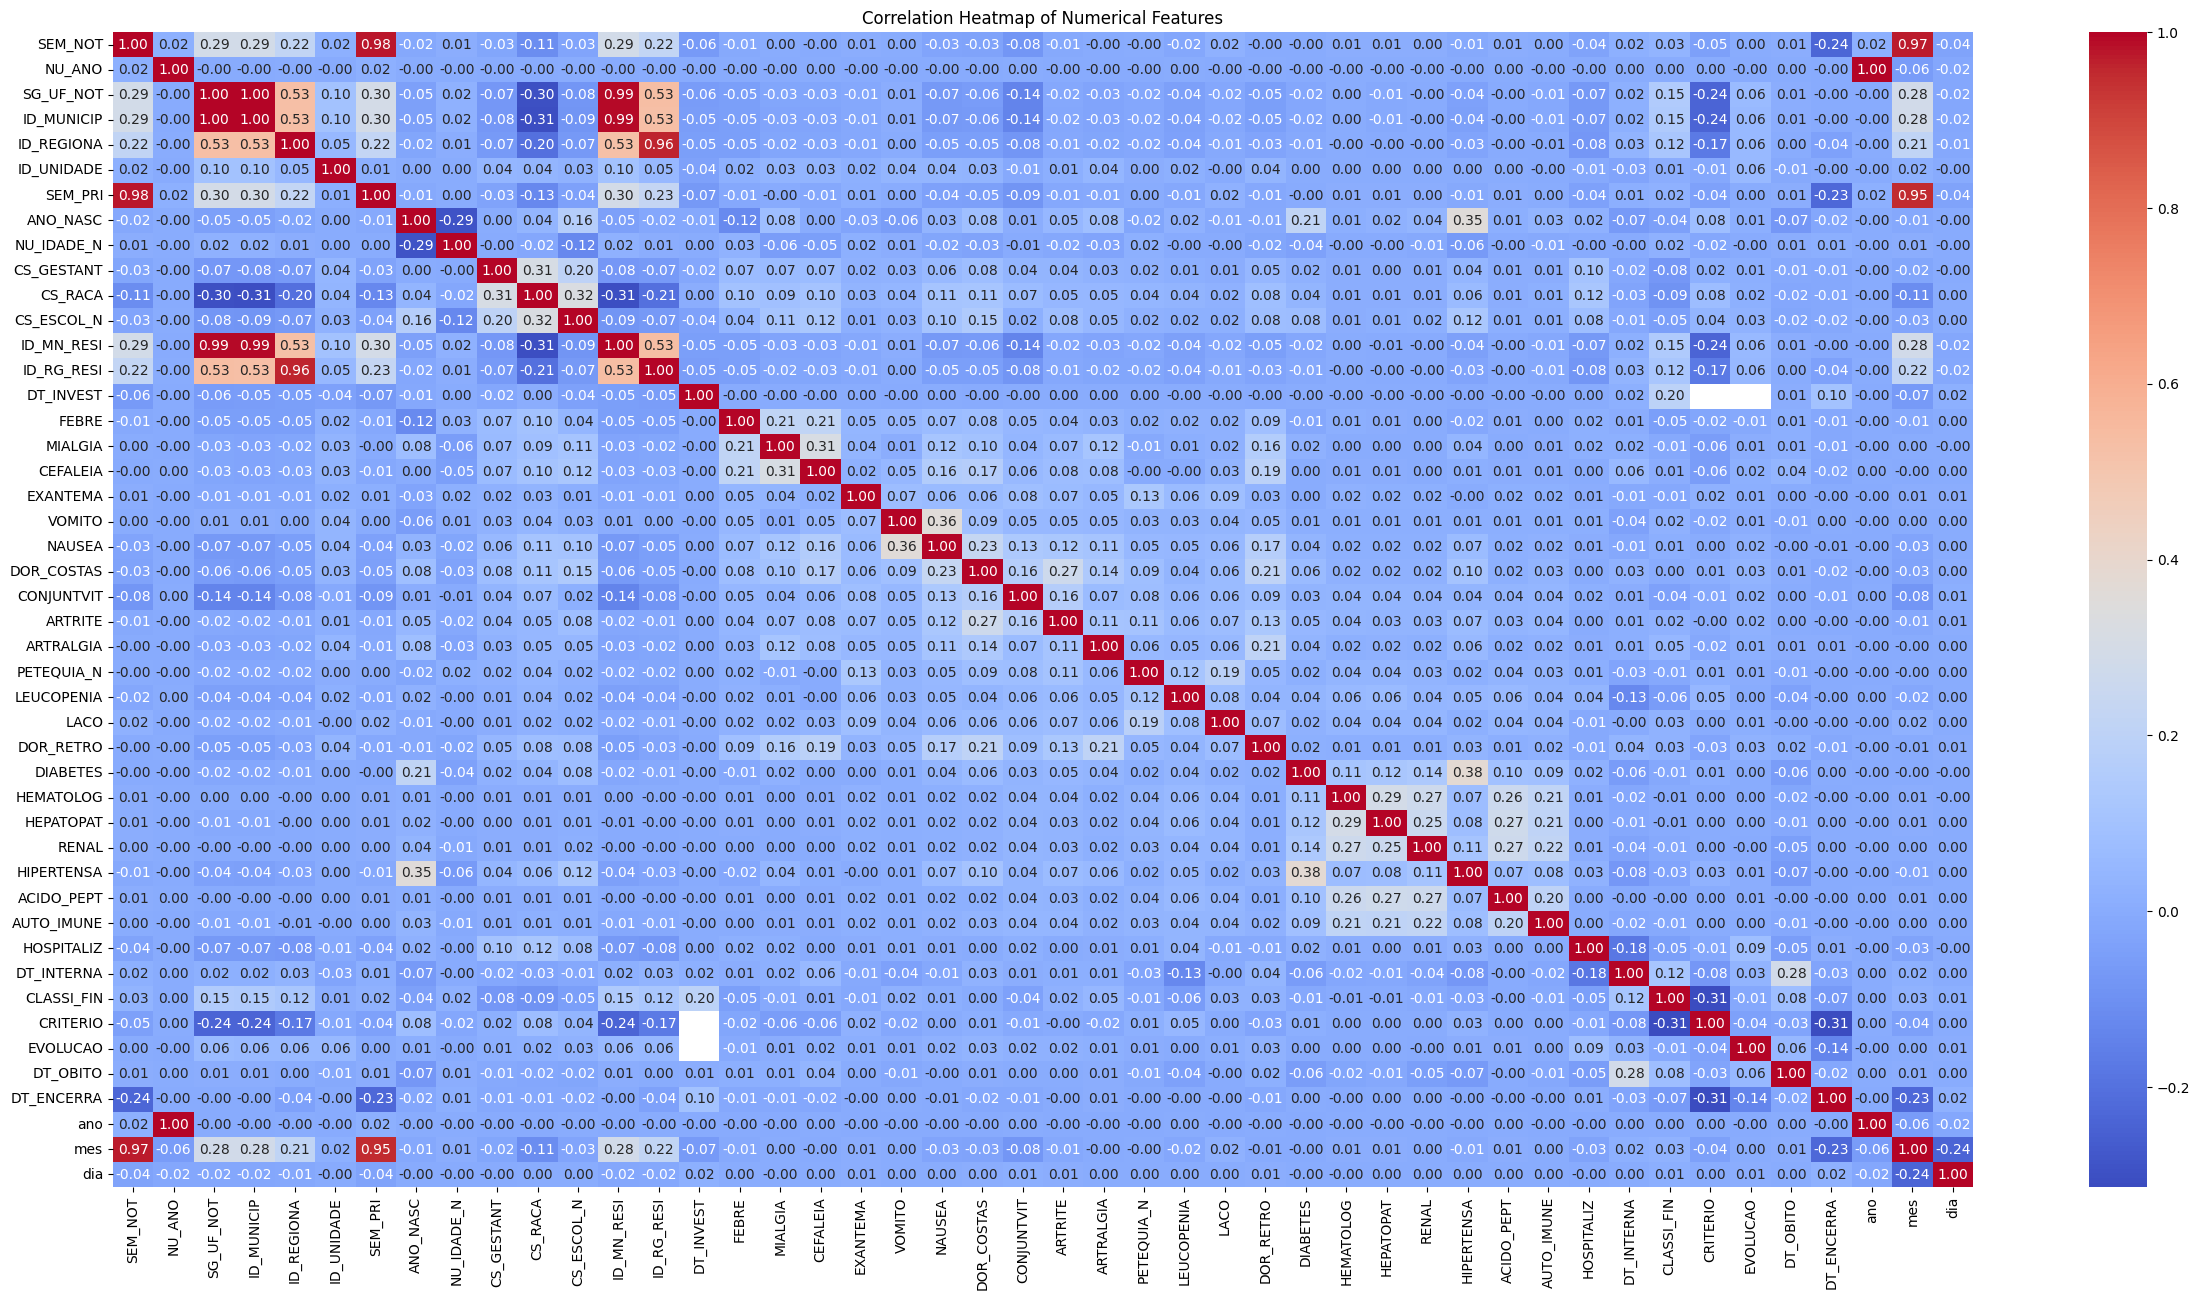

In [ ]:
plt.figure(figsize=(30, 15))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.svg', bbox_inches='tight')
plt.show()

In [ ]:
# Dropando colunas que achamos que nao sao relevantes para classificacao, ou que tem muita correlacao
new_df = df.drop(columns=['CS_RACA', 'SG_UF', 'ano', 'NU_IDADE_N', 'DT_DIGITA', 'mes', 'SEM_PRI', 'ID_MN_RESI', 'ID_RG_RESI', 'SG_UF_NOT'], axis=1)

# Definindo X e y
X = new_df.drop(columns=['DT_OBITO'], axis=1)
y = new_df['DT_OBITO']

## Classificação do modelo

Antes de iniciar o desenvolvimento do modelo, precisamos primeiro separar nossos dados em conjuntos de treinamento e de teste. Para isso, utilizamos somente o train test split, pois temos muitos dados no dataset (mais do que 20x o número de features). Nos nossos teste, utilizar o k-fold causava falta de RAM no colab.



RandomForest - Fold 1 Metrics:
Accuracy: 0.9992
Precision: 0.8135
Recall: 0.9149
F1-score: 0.8612
ROC AUC: 0.9999
PR AUC: 0.9649
Confusion Matrix:
[[120448     69]
 [    28    301]]

RandomForest - Fold 2 Metrics:
Accuracy: 0.9990
Precision: 0.7738
Recall: 0.9149
F1-score: 0.8384
ROC AUC: 0.9998
PR AUC: 0.9646
Confusion Matrix:
[[120429     88]
 [    28    301]]

RandomForest - Fold 3 Metrics:
Accuracy: 0.9985
Precision: 0.6689
Recall: 0.9182
F1-score: 0.7739
ROC AUC: 0.9998
PR AUC: 0.9377
Confusion Matrix:
[[120366    150]
 [    27    303]]

RandomForest - Fold 4 Metrics:
Accuracy: 0.9986
Precision: 0.6702
Recall: 0.9545
F1-score: 0.7875
ROC AUC: 0.9998
PR AUC: 0.9590
Confusion Matrix:
[[120361    155]
 [    15    315]]

RandomForest - Fold 5 Metrics:
Accuracy: 0.9987
Precision: 0.7092
Recall: 0.9091
F1-score: 0.7968
ROC AUC: 0.9998
PR AUC: 0.9491
Confusion Matrix:
[[120393    123]
 [    30    300]]

RandomForest - Average Metrics (Mean ± Std):
Accuracy: 0.9988 ± 0.0003
Precision: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Dummy - Fold 1 Metrics:
Accuracy: 0.9973
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000
PR AUC: 0.5014
Confusion Matrix:
[[120517      0]
 [   329      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Dummy - Fold 2 Metrics:
Accuracy: 0.9973
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000
PR AUC: 0.5014
Confusion Matrix:
[[120517      0]
 [   329      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Dummy - Fold 3 Metrics:
Accuracy: 0.9973
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000
PR AUC: 0.5014
Confusion Matrix:
[[120516      0]
 [   330      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Dummy - Fold 4 Metrics:
Accuracy: 0.9973
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000
PR AUC: 0.5014
Confusion Matrix:
[[120516      0]
 [   330      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Dummy - Fold 5 Metrics:
Accuracy: 0.9973
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000
PR AUC: 0.5014
Confusion Matrix:
[[120516      0]
 [   330      0]]

Dummy - Average Metrics (Mean ± Std):
Accuracy: 0.9973 ± 0.0000
Precision: 0.0000 ± 0.0000
Recall: 0.0000 ± 0.0000
F1-score: 0.0000 ± 0.0000
ROC AUC: 0.5000 ± 0.0000
PR AUC: 0.5014 ± 0.0000
[LightGBM] [Info] Number of positive: 482065, number of negative: 482065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.343733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8468
[LightGBM] [Info] Number of data points in the train set: 964130, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

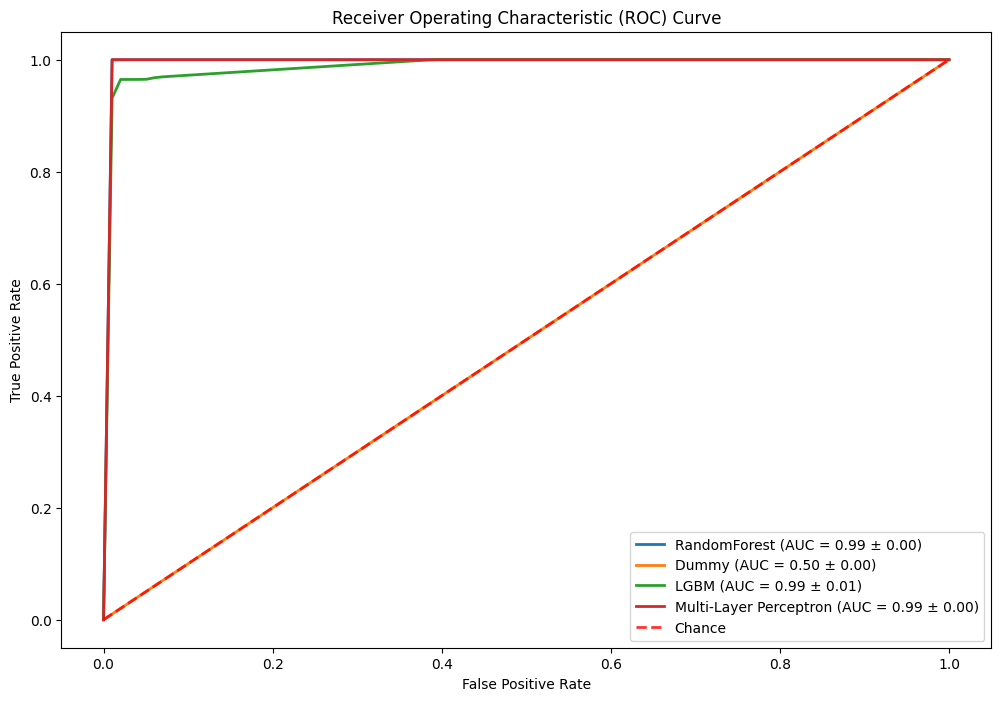

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier

classificadores = {
    "RandomForest": {
        "modelo": RandomForestClassifier(
            random_state=42,
            n_estimators=50,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt', # Added max_features
            class_weight='balanced'
        ),
        "scores": []
    },
    "Dummy": {
        "modelo": DummyClassifier(
            strategy="most_frequent"
        ),
        "scores": []
    },
    'LGBM': {
        'modelo': LGBMClassifier(
            random_state=42,
            class_weight='balanced',
            n_estimators=10,
            max_depth=3,
            min_child_samples=2,
            reg_alpha=0.1,
            reg_lambda=0.1
        ),
        'scores': []
    },
    "Multi-Layer Perceptron": {
        "modelo": MLPClassifier(
            random_state=42,
            activation='tanh',
            alpha=0.3,
            hidden_layer_sizes=(5,),
            max_iter=100,
            early_stopping = True
        ),
        "scores": []
    }
}

# Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Plotting
plt.figure(figsize=(12, 8))

for nome_classificador, dados_classificador in classificadores.items():
    modelo = dados_classificador['modelo']
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fold_metrics = []

    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Pre processamento
        X_train_prep, X_val_prep, _, _, _ = preprocess(X_train, X_val, y_train, y_val)

        # Oversampling (only for training data)
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)

        # Treinando
        modelo.fit(X_train_resampled, y_train_resampled)

        # Predicao de probabilidades e curva roc
        y_pred_proba = modelo.predict_proba(X_val_prep)[:, 1]
        y_pred = modelo.predict(X_val_prep)

        # Métricas
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

        # Matriz de confusao
        cm = confusion_matrix(y_val, y_pred)

        # curva pr auc
        precision_pr, recall_pr, _ = precision_recall_curve(y_val, y_pred_proba)
        pr_auc = auc(recall_pr, precision_pr)

        fold_metrics.append({
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1,
            'ROC AUC': roc_auc,
            'PR AUC': pr_auc
        })

        print(f"\n{nome_classificador} - Fold {fold} Metrics:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"PR AUC: {pr_auc:.4f}")
        print("Confusion Matrix:")
        print(cm)

    # Computando a media dos folds
    mean_metrics = {k: np.mean([m[k] for m in fold_metrics]) for k in fold_metrics[0]}
    std_metrics = {k: np.std([m[k] for m in fold_metrics]) for k in fold_metrics[0]}

    print(f"\n{nome_classificador} - Average Metrics (Mean ± Std):")
    for metric, value in mean_metrics.items():
        print(f"{metric}: {value:.4f} ± {std_metrics[metric]:.4f}")

    # Roc e auc
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, lw=2,
             label=f'{nome_classificador} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

# Plot mean ROC curves
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.svg', bbox_inches='tight')
plt.show()

## Extraindo importancia das features do random forest

In [ ]:
feature_importances = classificadores['RandomForest']['modelo'].feature_importances_
_, _, _, _, feature_names = preprocess(X, X, y, y)

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the bar chart using Vega-Altair
chart = alt.Chart(feature_importance_df).mark_bar().encode(
    x=alt.X('Importance:Q', axis=alt.Axis(title='Feature Importance')),
    y=alt.Y('Feature:N', sort='-x', axis=alt.Axis(title='Feature')),
    tooltip=['Feature', 'Importance']
).properties(
    title='Random Forest Feature Importance',
    width=800,
    height=600
)

chart.display() # or chart.show() in Jupyter

alt.Chart(...)

In [ ]:
importance_gain = classificadores['LGBM']['modelo'].feature_importances_  # Only 'gain' based importance is available this way

# Create DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_gain})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create Vega-Altair Chart
chart = alt.Chart(importance_df).mark_bar().encode(
    x=alt.X('Importance:Q', axis=alt.Axis(title='Feature Importance')),
    y=alt.Y('Feature:N', sort='-x', axis=alt.Axis(title='Feature')),
    tooltip=['Feature', 'Importance']
).properties(
    title='LightGBM Feature Importance (Gain)',
    width=800,
    height=600
)

chart.display()


alt.Chart(...)